In [33]:
from imutils import paths
from pathlib import Path
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image as image_utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

import data_utils
import shutil
import pathlib

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook is for debugging purposes. To split data just use `data_utils.copy_files()` (it doesn't depend on a machine - we sort our filenames before split, we also set seed for `sklearn` `train_test_split`). To test your split use `test_data_utils`.

## first look at the data

We have 2594 images and masks. Let's have a look at them and then we'll split them into train, validation and test.

In [2]:
data_utils.args.image_dir, data_utils.args.mask_dir

(PosixPath('/Users/ilyarudyak/data/isic_2018/images'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/masks'))

In [3]:
image_paths = data_utils.args.image_dir.glob('*.jpg')
mask_paths = data_utils.args.mask_dir.glob('*.png')

In [4]:
len(list(image_paths)), len(list(mask_paths))

(2594, 2594)

In [5]:
list(data_utils.args.image_dir.glob('*.jpg'))[:5]

[PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000025.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010236.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0011128.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000031.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010222.jpg')]

In [6]:
sorted(list(data_utils.args.image_dir.glob('*.jpg')))[:5]

[PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000000.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000001.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000003.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000004.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000006.jpg')]

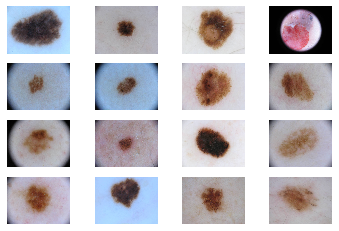

In [7]:
data_utils.show_images_from_path()

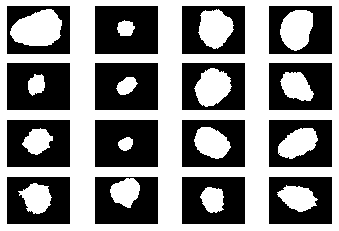

In [8]:
data_utils.show_masks_from_path()

## split filenames

In [9]:
data_utils.args.dirs

{'train_images': PosixPath('/Users/ilyarudyak/data/isic_2018/train/images'),
 'train_masks': PosixPath('/Users/ilyarudyak/data/isic_2018/train/masks'),
 'val_images': PosixPath('/Users/ilyarudyak/data/isic_2018/val/images'),
 'val_masks': PosixPath('/Users/ilyarudyak/data/isic_2018/val/masks'),
 'test_images': PosixPath('/Users/ilyarudyak/data/isic_2018/test/images'),
 'test_masks': PosixPath('/Users/ilyarudyak/data/isic_2018/test/masks')}

In [ ]:
# for dir_name in dirs.values():
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)

In [12]:
train_paths, val_paths, test_paths = data_utils.get_split_filenames()

In [13]:
train_paths.shape, val_paths.shape, test_paths.shape

((1556,), (519,), (519,))

Looks like our split is correct - training data is 40%, validation and test data are both 20%. 

In [14]:
1556 + 519 * 2, 1556 / 2594, 519 /2594

(2594, 0.599845797995374, 0.20007710100231302)

In [15]:
# this is the result on my local machine
train_paths[:5]

array([PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010379.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000322.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010596.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0013861.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0012230.jpg')],
      dtype=object)

In [ ]:
# let's check the result on Google Cloud VM
# should be the same - use sorted list of files and set seed
train_paths[:5]

In [56]:
sorted(train_paths)[:5]

[PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000000.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000001.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000003.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000004.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000006.jpg')]

## copy images to split folders

In [38]:
paths = train_paths[:5]

In [39]:
paths

array([PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010379.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000322.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010596.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0013861.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0012230.jpg')],
      dtype=object)

In [40]:
data_utils.copy_files_split(paths)

In [41]:
!tree /Users/ilyarudyak/data/isic_2018/train

/Users/ilyarudyak/data/isic_2018/train
├── images
│   ├── ISIC_0000322.jpg
│   ├── ISIC_0010379.jpg
│   ├── ISIC_0010596.jpg
│   ├── ISIC_0012230.jpg
│   └── ISIC_0013861.jpg
└── masks
    ├── ISIC_0000322_segmentation.png
    ├── ISIC_0010379_segmentation.png
    ├── ISIC_0010596_segmentation.png
    ├── ISIC_0012230_segmentation.png
    └── ISIC_0013861_segmentation.png

2 directories, 10 files


Let's check that we copied files correctly.

In [43]:
!ls /Users/ilyarudyak/data/isic_2018/train/images/ | wc

    1556    1556   26452


In [44]:
!ls /Users/ilyarudyak/data/isic_2018/val/images/ | wc

     519     519    8823


In [45]:
!ls /Users/ilyarudyak/data/isic_2018/test/images/ | wc

     519     519    8823


In [52]:
train_paths_actual = list(data_utils.args.dirs['train_images'].glob('*'))

In [53]:
len(train_paths_actual)

1556

In [55]:
sorted(train_paths_actual)[:5]

[PosixPath('/Users/ilyarudyak/data/isic_2018/train/images/ISIC_0000000.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/train/images/ISIC_0000001.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/train/images/ISIC_0000003.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/train/images/ISIC_0000004.jpg'),
 PosixPath('/Users/ilyarudyak/data/isic_2018/train/images/ISIC_0000006.jpg')]

In [61]:
str(sorted(train_paths)[0]).split('/')[-1] == str(sorted(train_paths_actual)[0]).split('/')[-1]

True

In [62]:
paths

array([PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010379.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0000322.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0010596.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0013861.jpg'),
       PosixPath('/Users/ilyarudyak/data/isic_2018/images/ISIC_0012230.jpg')],
      dtype=object)

In [66]:
list(map(data_utils.get_filename_from_path, sorted(paths)))

['ISIC_0000322.jpg',
 'ISIC_0010379.jpg',
 'ISIC_0010596.jpg',
 'ISIC_0012230.jpg',
 'ISIC_0013861.jpg']

In [68]:
!ls /Users/ilyarudyak/data/isic_2018/train/masks/ | head -3

ISIC_0000000_segmentation.png
ISIC_0000001_segmentation.png
ISIC_0000003_segmentation.png


In [71]:
s = 'ISIC_0000001_segmentation.png'

In [73]:
s[:12]

'ISIC_0000001'

In [78]:
mask_path = sorted(list(data_utils.args.dirs['train_masks'].glob('*')))[1]

In [79]:
mask_path

PosixPath('/Users/ilyarudyak/data/isic_2018/train/masks/ISIC_0000001_segmentation.png')

In [81]:
data_utils.get_image_filename_from_mask_path(mask_path)

'ISIC_0000001.jpg'